In [56]:
import zipfile

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Jaguar_Cheetha_Tiger.zip",'r')
zip_ref.extractall("/tmp/Dataset")
zip_ref.close()

# def fixBadZipfile(main_path):  
#  f = open(main_path, 'r+b') 
#  data = f.read()  
#  pos = data.find('\x50\x4b\x05\x06') # End of central directory signature  
#  if (pos > 0):  
#      self._log("Trancating file at location " + str(pos + 22)+ ".")  
#      f.seek(pos + 22)   # size of 'ZIP end of central directory record' 
#      f.truncate()  
#      f.close()   

In [59]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as d
import tensorflow_hub as hub

In [78]:
test_dir = "/tmp/Dataset/Jaguar_Cheetha_Tiger/Test"
train_dir = "/tmp/Dataset/Jaguar_Cheetha_Tiger/Train"

In [79]:
batch_size = 128
img_height = 224
img_width = 224

In [80]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
  seed=111,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2700 files belonging to 3 classes.


In [81]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
  seed=111,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 300 files belonging to 3 classes.


In [82]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(128, 224, 224, 3)
(128,)


In [83]:
classes=train_ds.class_names
print(classes)

['cheetah_train_resized', 'jaguar_train_resized', 'tiger_train_resized']


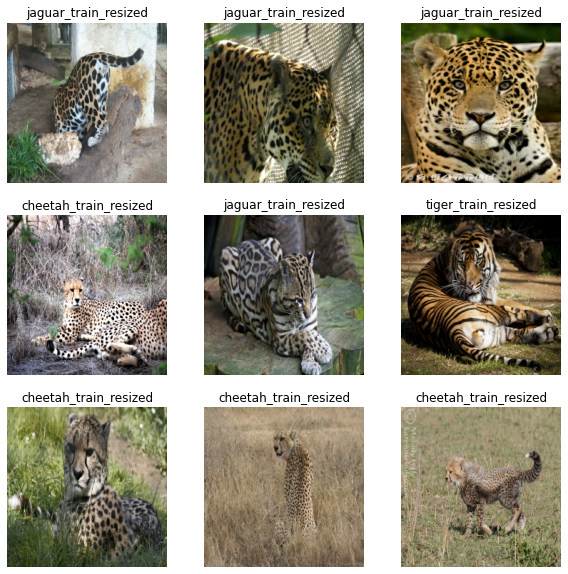

In [84]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(classes[labels[i]])
    plt.axis("off")

In [85]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [86]:
feature_extractor = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [87]:
feature_extractor_layer = hub.KerasLayer(feature_extractor, input_shape=(img_height,img_width,3))

In [88]:
feature_extractor_layer.trainable = False

In [89]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [90]:
tf.random.set_seed(42)

In [91]:
model = tf.keras.Sequential([
  normalization_layer,
  feature_extractor_layer,
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(3,activation='softmax')
])

In [92]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [93]:
history = model.fit(train_ds, epochs=20, validation_data=test_ds)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


22/22 [==============================] - 11s 298ms/step - loss: 0.5631 - accuracy: 0.7922 - val_loss: 0.1128 - val_accuracy: 0.9900
Epoch 2/20
22/22 [==============================] - 4s 175ms/step - loss: 0.0772 - accuracy: 0.9907 - val_loss: 0.0519 - val_accuracy: 0.9900
Epoch 3/20
22/22 [==============================] - 4s 175ms/step - loss: 0.0478 - accuracy: 0.9933 - val_loss: 0.0423 - val_accuracy: 0.9933
Epoch 4/20
22/22 [==============================] - 4s 175ms/step - loss: 0.0388 - accuracy: 0.9941 - val_loss: 0.0383 - val_accuracy: 0.9933
Epoch 5/20
22/22 [==============================] - 4s 177ms/step - loss: 0.0352 - accuracy: 0.9944 - val_loss: 0.0353 - val_accuracy: 0.9933
Epoch 6/20
22/22 [==============================] - 4s 175ms/step - loss: 0.0331 - accuracy: 0.9948 - val_loss: 0.0332 - val_accuracy: 0.9933
Epoch 7/20
22/22 [==============================] - 4s 174ms/step - loss: 0.0312 - accuracy: 0.9941 - val_loss: 0.0319 - val_accuracy: 0.9933
Epoch 8/20
22/22

In [94]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
keras_layer_3 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 3843      
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


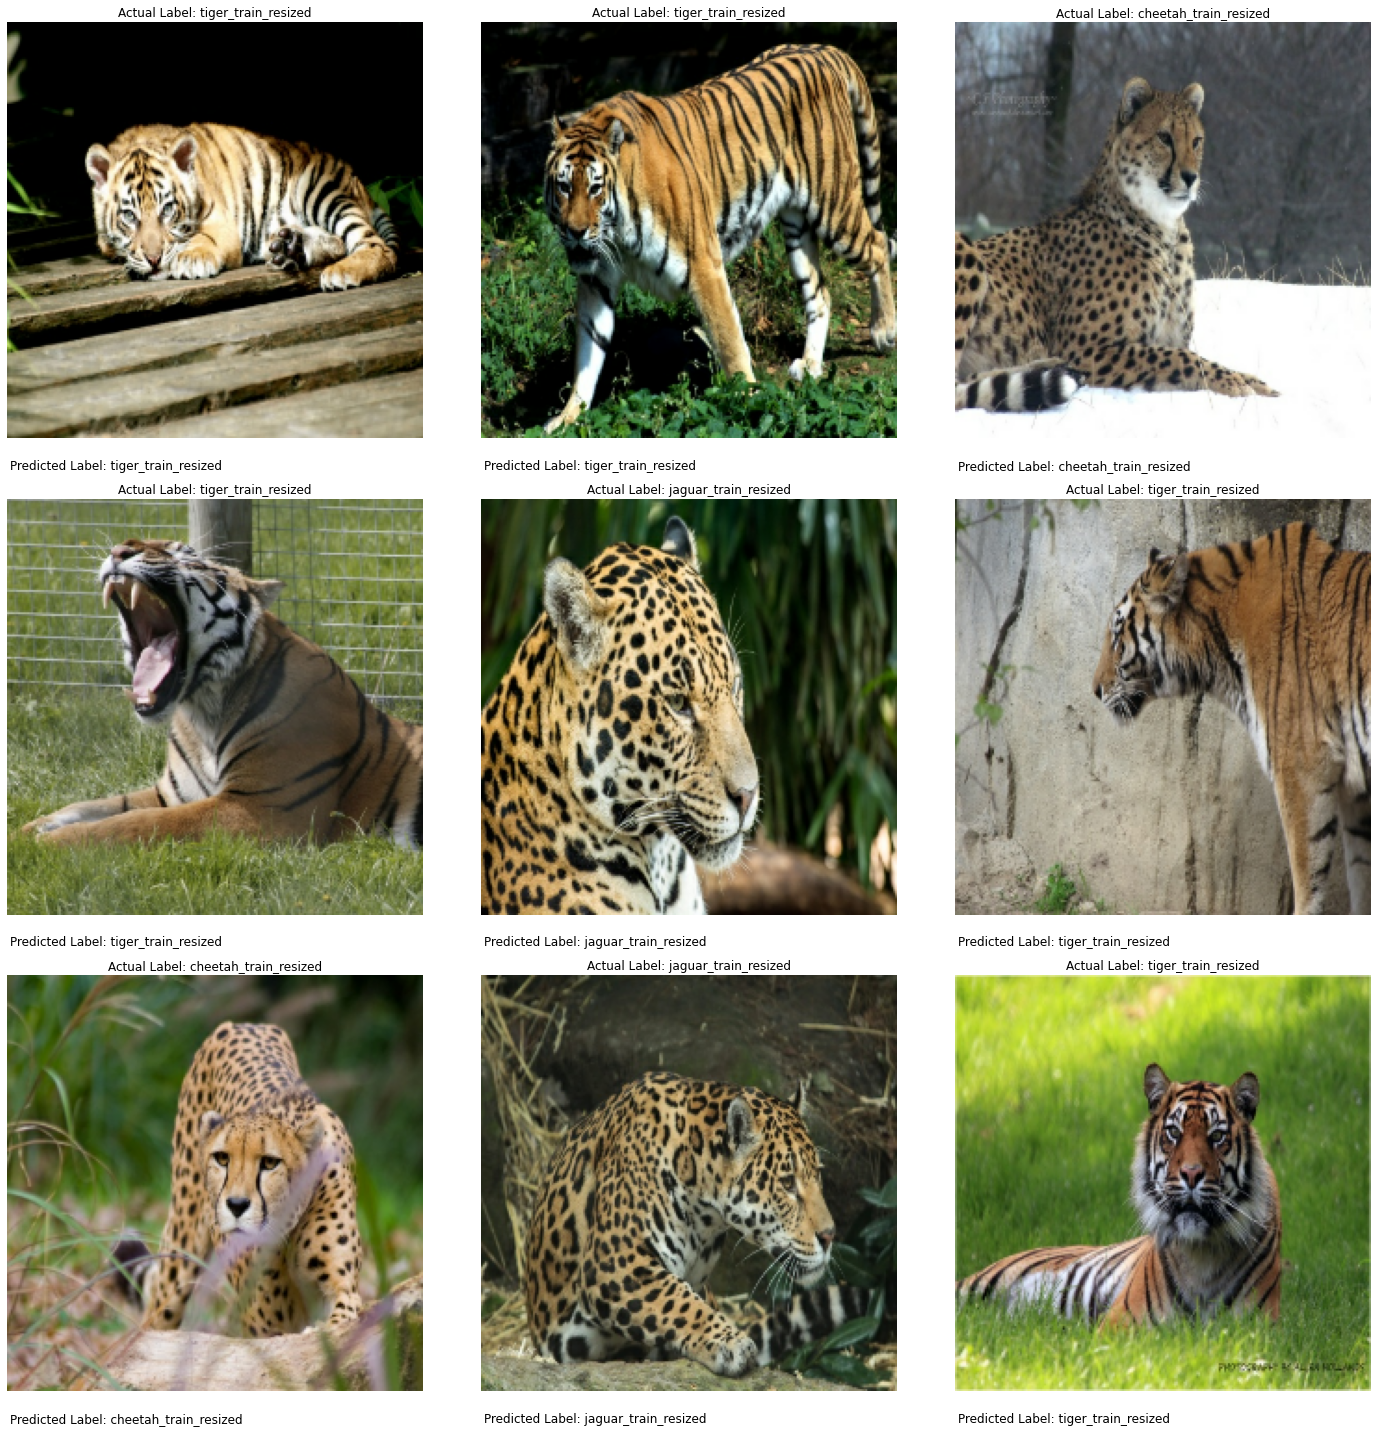

In [95]:
plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)

    plt.tight_layout()
    
    img = tf.keras.preprocessing.image.img_to_array(images[i])                    
    img = np.expand_dims(img, axis=0)  

    pred=model.predict(img)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title("Actual Label: %s" % classes[labels[i]])
    plt.text(1, 240, "Predicted Label: %s" % classes[np.argmax(pred)], fontsize=12)

    plt.axis("off")

In [96]:
# labels =  np.array([])

# for x,y in test_ds.take(1):
#     print(y.shape)
#     labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])


# labels.shape()

In [97]:
# labels = np.array([y for x, y in test_ds.take(1)])
# labels=np.squeeze(labels,axis = 0)

# labels.shape


In [98]:
# labels.shape

In [99]:
# y_pred.shape

In [100]:
# y_pred = model.predict(test_ds.take(1))
# y_pred = np.argmax(y_pred, axis=1)

# y_pred.shape

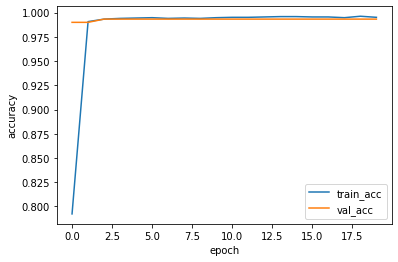

In [101]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'], loc='best')
plt.show()

In [102]:
model.save('./models', save_format = 'tf')

INFO:tensorflow:Assets written to: ./models/assets


INFO:tensorflow:Assets written to: ./models/assets


In [103]:
!ls -alrt models

total 2064
drwxr-xr-x 1 root root    4096 Jun  6 10:30 ..
drwxr-xr-x 2 root root    4096 Jun  6 10:30 assets
drwxr-xr-x 2 root root    4096 Jun  6 10:41 variables
-rw-r--r-- 1 root root 2087587 Jun  6 10:41 saved_model.pb
drwxr-xr-x 4 root root    4096 Jun  6 10:41 .
-rw-r--r-- 1 root root    6661 Jun  6 10:41 keras_metadata.pb


In [104]:
model_loaded = tf.keras.models.load_model('./models/')

In [105]:
model_loaded.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
keras_layer_3 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 3843      
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


In [106]:
#Post Processing the data
from PIL import Image
import numpy as np
from skimage import transform
def process(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')
   np_image = transform.resize(np_image, (224, 224, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

In [107]:
pred_label=model_loaded.predict(process('/tmp/Jaguar_Cheetha_Tiger/Test/jaguar_validation_resized/jaguar_002_val_resized.jpg'))
print(classes[np.argmax(pred_label)])

jaguar_train_resized


In [108]:
pred_label

array([[0.00589337, 0.98288316, 0.0112235 ]], dtype=float32)

In [109]:
!zip -r models.zip models/

  adding: models/ (stored 0%)
  adding: models/assets/ (stored 0%)
  adding: models/variables/ (stored 0%)
  adding: models/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: models/variables/variables.index (deflated 78%)
  adding: models/saved_model.pb (deflated 91%)
  adding: models/keras_metadata.pb (deflated 82%)
